<a href="https://colab.research.google.com/github/kimheeyunn/machinelearning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-12 06:57:30--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-12 06:57:30--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-12 06:57:30--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

target = np.array([0]*100 + [1]*100 + [2]*100)

Accuracy: 0.9833


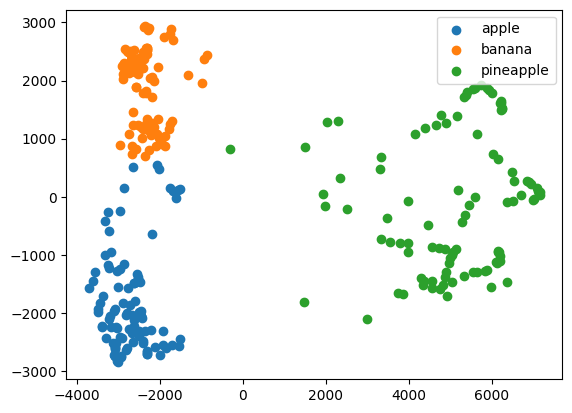

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# PCA를 사용해 차원 축소
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
fruits_pca = pca.transform(fruits_2d)

# KNN 분류기를 사용
knn = KNeighborsClassifier(n_neighbors=5)

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(fruits_pca, target, test_size=0.2, random_state=42)

# KNN 분류기 학습
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = knn.predict(X_test)

# 성능 측정
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

# PCA 결과 시각화
for label in range(0, 3):
    data = fruits_pca[target == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()



In [11]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9875
0.9833333333333333


In [12]:
# 테스트 데이터에 대한 예측 수행
y_pred = knn.predict(X_test)

In [13]:
# 컨퓨전 매트릭스 계산
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[21  1  0]
 [ 0 16  0]
 [ 0  0 22]]


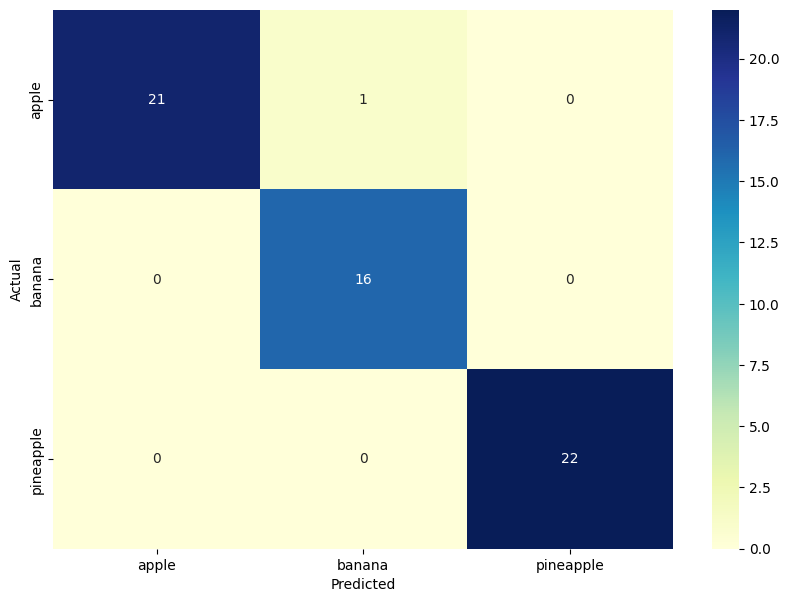

In [14]:
# 컨퓨전 매트릭스를 히트맵으로 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g',
            xticklabels=['apple', 'banana', 'pineapple'],
            yticklabels=['apple', 'banana', 'pineapple'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
confusion_matrix = np.array(cm)

# True Positives (TP)는 대각선 상의 값들의 합
TP_sum = np.sum(np.diag(confusion_matrix))

# Total Observations는 모든 값을 합한 것
total_observations = np.sum(confusion_matrix)

# Accuracy 계산
accuracy = TP_sum / total_observations

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98
